## Kaggle 대회 정리

### 우주왕복선 타이타닉 : 어떤 탑승객이 다른차원으로 전송되었는지 예측하라!

* 대회명 : Spaceship Titanic : Predict which passengers are transported to an alternate dimension
* 링크 : https://www.kaggle.com/competitions/spaceship-titanic

**<목차>**
1. 대회이해하기
2. EDA\#01 : 데이터체크
3. EDA\#02 : 데이터 이해

In [271]:
# 라이브러리 로드

# 시스템 라이브러리

# Error가 아닌 Warnning 숨김 (에러가 아닌데 버전변경됐다 정도 메시지가 붉은색으로 나와 보기 싫음)
import warnings
warnings.filterwarnings('ignore')

# 데이터 핸들링 라이브러리
import pandas as pd
import numpy as np

#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# matplolib 한글폰트 랜더링을 위한 font설정
plt.rc('font', family='AppleGothic') # MacOS
plt.rc('font', size=9)  

# seaborn 색상팔래트 사용
sns.color_palette("pastel")


%matplotlib inline

### STEP01 : 데이터 로드

In [272]:
## 경로설정
path_train = "./raw/train.csv"
path_test = "./raw/test.csv"


## pandas DataFrame으로 로드
raw_train = pd.read_csv(path_train)
raw_test = pd.read_csv(path_test)

## EDA 
* EDA의 목적은 정말로 데이터에 대한 이해를 위한 작업
* 다만, 항상 우리의 EDA 목적이 Target과 변수간 관계를 찾기위함임을 잊어서는 안됨.

### 단일변수 탐색 (범주형)

* 이해를 위해 범주형 먼저 살펴봄. target변수 외에 어떤 변수 순서로 보던 관계없으나 한가지 팁은 쉬운 변수부터 살펴보는것이 좋음.

*한개의 범주형의 순차대로 살펴보고 이후는 모두 동일하게 진행하기 때문에 간략하게 진행함*

In [273]:
raw_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Target 변수 EDA
* 항상 Target 변수가 가장 중요하기 때문에 Target변수에 대해서 먼저 살펴바야함

In [274]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["Transported"].value_counts()
count_var

True     4378
False    4315
Name: Transported, dtype: int64

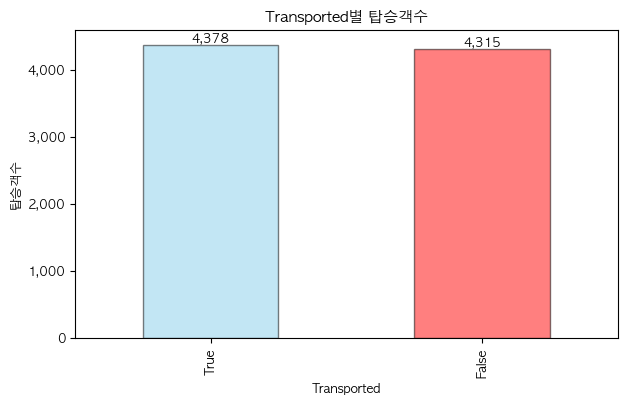

In [275]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 시각화

## seaborn barplot 사용
#sns.barplot(data=raw_train, x="HomePlanet", y="Transported", errorbar=None, palette=sns.color_palette("husl", 3))
f, ax = plt.subplots(1, 1, figsize=(7, 4))

count_var.plot(kind="bar",
               title="Transported별 탑승객수",
               xlabel="Transported",
               ylabel="탑승객수",
               ax=ax,
               stacked=True,
               color=["skyblue", "red"],
               alpha=0.5,
               edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

# 데이터 라벨 출력코드
for c in ax.containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax.bar_label(c, labels=labels)

#sns.countplot(data=raw_train, x="HomePlanet",palette=sns.color_palette("husl", 3))
plt.show()

### EDA 결과 : 
* Transported 타겟변수는 굉장히 50:50에 근접하게 balanced 변수이다. 따라서 별도의 unbalanced 전략은 필요없음을 확인함.

### HomePlanet
* 변수 설명 : 승객들이 출발한 행성입니다. 일반적으로 승객들이 일생을 보낸 행성입니다.
* 변수 타입 : 범주형(Categorycal Variable)
* 탐색 방법 : 막대그래프, 교차표(Cross table)

In [276]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["HomePlanet"].value_counts()
count_var

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

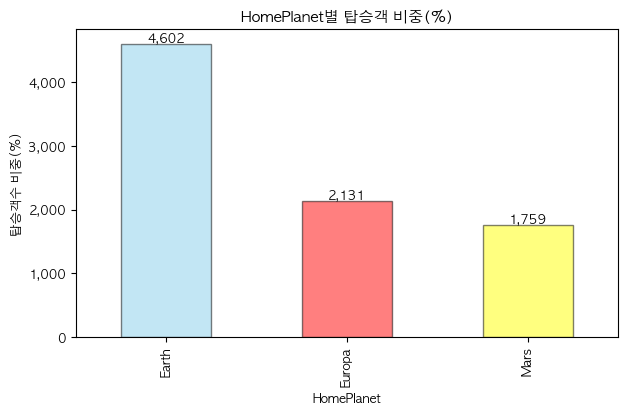

In [277]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 시각화

## seaborn barplot 사용
#sns.barplot(data=raw_train, x="HomePlanet", y="Transported", errorbar=None, palette=sns.color_palette("husl", 3))
f, ax = plt.subplots(1, 1, figsize=(7, 4))

count_var.plot(kind="bar",
               title="HomePlanet별 탑승객 비중(%)",
               xlabel="HomePlanet",
               ylabel="탑승객수 비중(%)",
               ax=ax,
               stacked=True,
               color=["skyblue", "red", "yellow"],
               alpha=0.5,
               edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

# 데이터 라벨 출력코드
for c in ax.containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax.bar_label(c, labels=labels)

#sns.countplot(data=raw_train, x="HomePlanet",palette=sns.color_palette("husl", 3))
plt.show()

### EDA 결과 : 
* Earth가 가장많이 존재하며, Mars(화성), Europa(목성)은 비슷비슷함 >> 특별한 인사이트는 없음

In [278]:
# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["HomePlanet"], raw_train["Transported"])
cross_table_cnt

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


In [279]:
# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["HomePlanet"], raw_train["Transported"], normalize=True)
cross_table_ratio

# [EDA Point] : 아래 결과가 왜 현재우리가 알고자 하는 부분과는 관계가 없을지 아래 분할표와 비교하며 생각해보기

Transported,False,True
HomePlanet,,
Earth,0.312176,0.229746
Europa,0.085610,0.165332
Mars,0.098799,0.108337


In [280]:
# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["HomePlanet"], raw_train["Transported"], normalize="index")
cross_table_ratio

Transported,False,True
HomePlanet,,
Earth,0.576054,0.423946
Europa,0.341154,0.658846
Mars,0.476976,0.523024


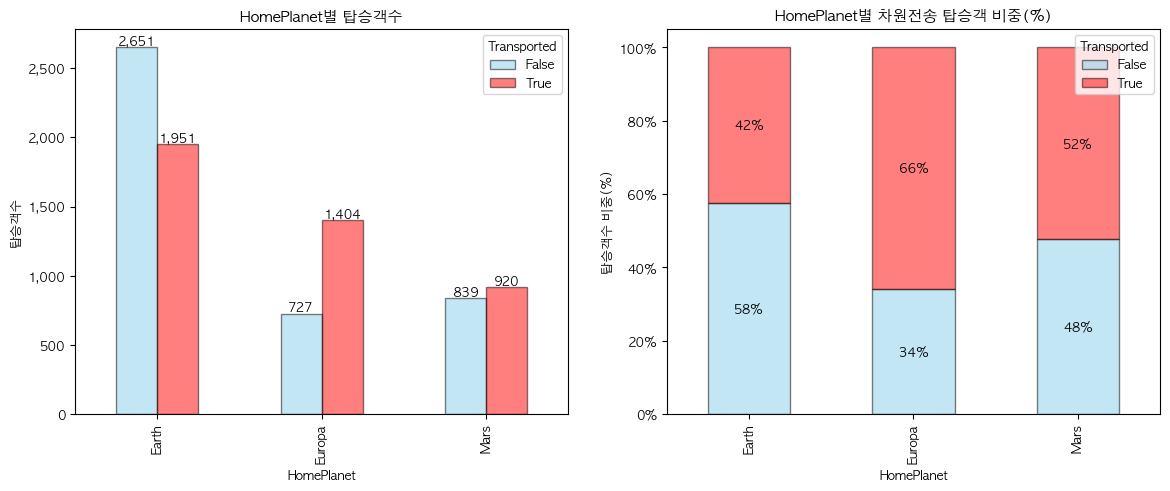

In [281]:
# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 5))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax1(우측)
cross_table_cnt.plot(kind="bar",
                     title="HomePlanet별 탑승객수",
                     xlabel="HomePlanet",
                     ylabel="탑승객수",
                     ax=ax[0],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="HomePlanet별 차원전송 탑승객 비중(%)",
                       xlabel="HomePlanet",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[1],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

### EDA 결과 : 
* Earth에서 출발하는경우 오히려 다른차원으로 이동한 케이스가 다른 2행성보다 적었음
* EMars(화성)는 차원이동에 대해 비슷한 비중을 보이(단, 살짝 이동하는 케이스가 높음)
* Europa(목성)은 66%가량이 차원이동을 당했음.

### CryoSleep
* 변수 설명 : 가사(suspended animation)방식 항해 선택하였는지 여부입니다.(승객의 객실(cabin)을 통해 더 정확하게 구분할 수 있습니다.)
* 변수 타입 : 범주형(Categorycal Variable), 이진분류, 불리언
* 탐색 방법 : 막대그래프, 교차표(Cross table)

In [282]:
# NaN값 체크
raw_train["CryoSleep"].isnull().sum()

217

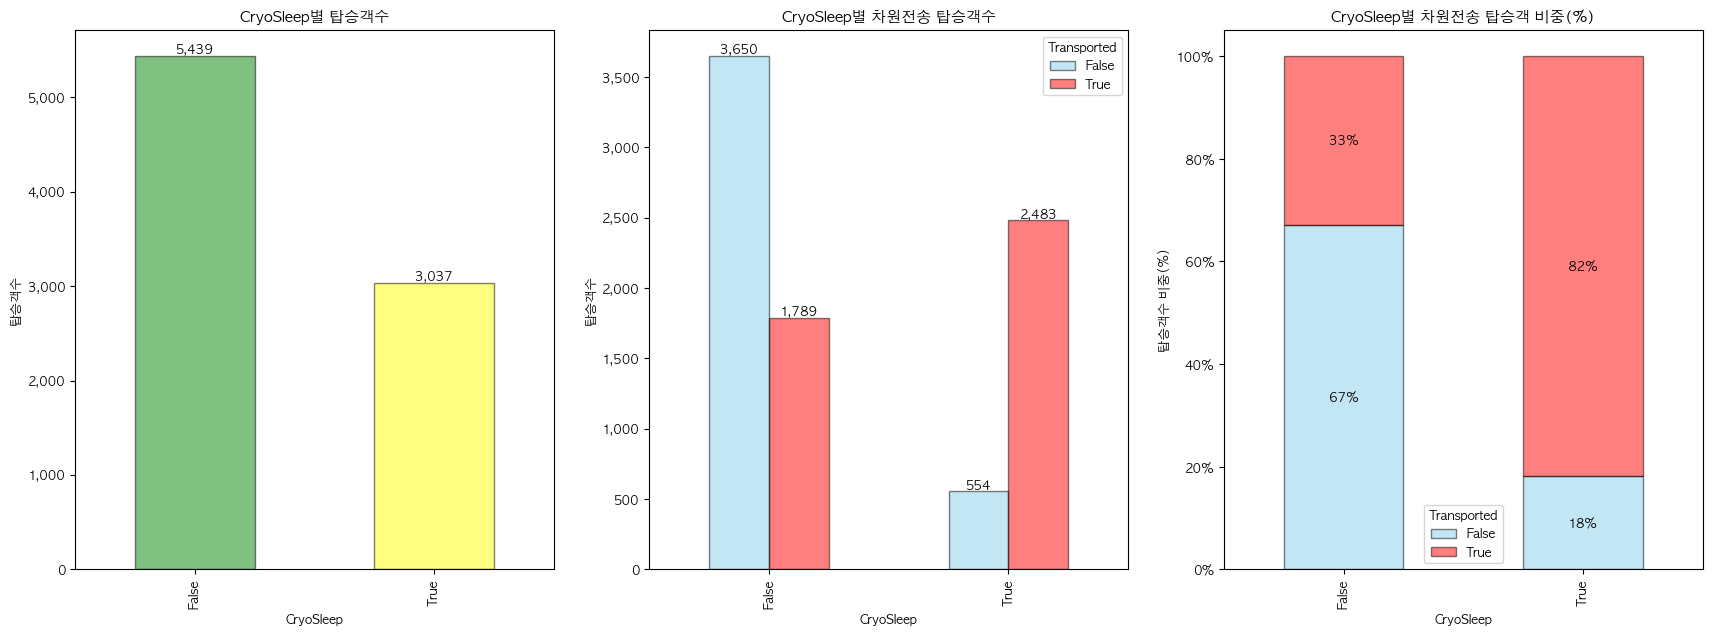

In [283]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["CryoSleep"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["CryoSleep"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["CryoSleep"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="CryoSleep별 탑승객수",
               xlabel="CryoSleep",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow"],
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="CryoSleep별 차원전송 탑승객수",
                     xlabel="CryoSleep",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="CryoSleep별 차원전송 탑승객 비중(%)",
                       xlabel="CryoSleep",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

### EDA 결과 : 
* CryoSleep을 선택한 경우 다른차원으로 이동한 케이스가 그렇지 않은 부분에 비해 압도적으로 높았음

In [284]:
raw_train.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


### Destination
* 변수 설명 : 승객들이 내리고자하는 행성입니다. 
* 변수 타입 : 범주형(Categorycal Variable)
* 탐색 방법 : 막대그래프, 교차표(Cross table)
    
\- *Cabin 을 건너뛴 이유는 데이터 설명과 체크에서 살펴봤듯 파생변수를 만들어야할 필요성이 존재하고, 숨겨진 규칙이 필요할것 같기 때문에 건너뜀*
<br>
\- *반면 Destination은 대회 설명에서 봤듯 3개의 정해진 목적지가 있었기 때문에 쉬울것이라고 판단하고 진행함*

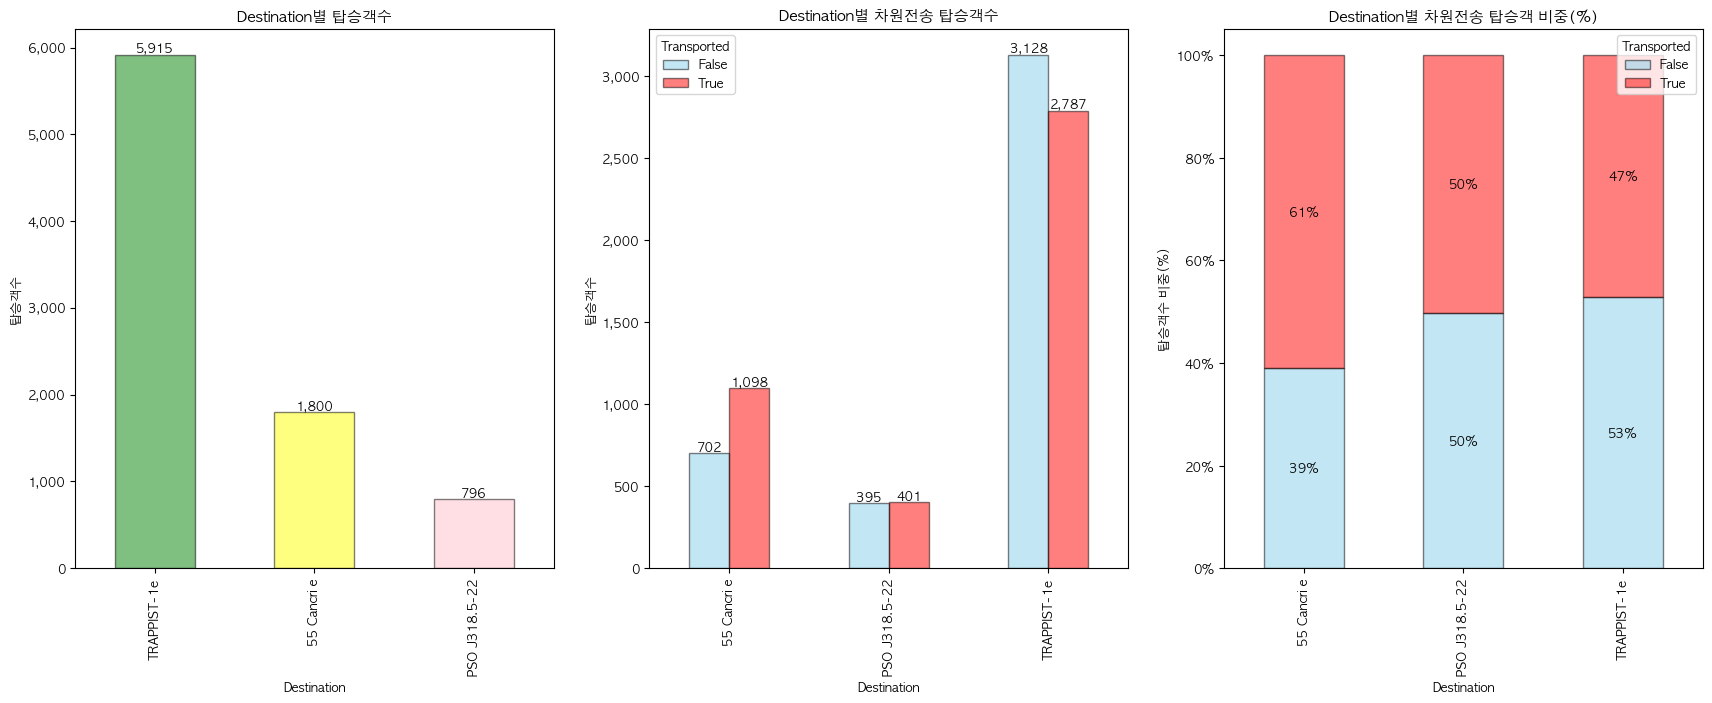

In [285]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["Destination"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["Destination"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["Destination"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="Destination별 탑승객수",
               xlabel="Destination",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow", "pink"], #이 부분은 수동으로 범주수를 파악후 다시 맞춰서 넣어주는중
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="Destination별 차원전송 탑승객수",
                     xlabel="Destination",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="Destination별 차원전송 탑승객 비중(%)",
                       xlabel="Destination",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

### EDA 결과 : 
* Destination별로 차원전송여부의 영향이 존재, 그러나 크지않았음. 단, 55 Cantouri e의 경우 61% 가량이 차원전송당한 특이 사항이 발견  
* 가설 : 순차대로 도착하는 특성을 유추해볼때, 도착지의 거리가 멀수록 차원전송의 위험에 노출됐을 가능성이 존재함. >> 도착지간의 거리로 파생변수를 만들 수 있지 않을까?

* 여기서 50% 50%인 PSO도착지를 제거판단을 하지 않는것은 한개의 변수만 살펴봤기 때문, 만약 다른 변수랑 같이 볼 경우 다른 패턴이 나올 수 있음(심슨패러독스)

### VIP
* 변수 설명 : 탑승객이 항해도중 VIP 서비스를 신청하고 지불하였는지 아닌지 여부 입니다.
* 변수 타입 : 범주형(Categorycal Variable), 이진분류, 불리언
* 탐색 방법 : 막대그래프, 교차표(Cross table)

In [286]:
raw_train.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


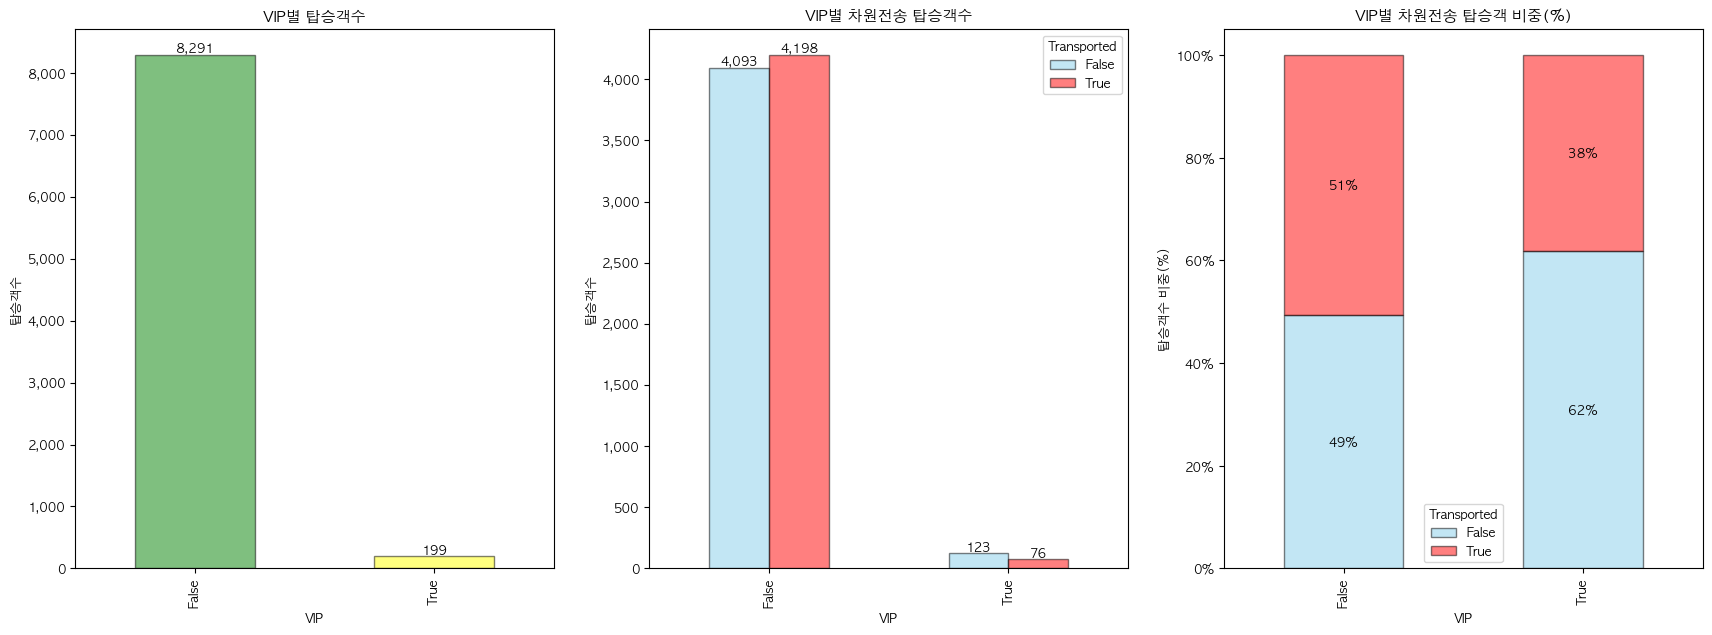

In [287]:
# 각 카테고리 별로 몇개의 observation이 존재하는지 체크
## pandas value_counts() 매소드 사용

count_var = raw_train["VIP"].value_counts()
count_var

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_cnt = pd.crosstab(raw_train["VIP"], raw_train["Transported"])
cross_table_cnt

# 타겟-EDA변수간 교차표(Cross table)생성
cross_table_ratio = pd.crosstab(raw_train["VIP"], raw_train["Transported"], normalize="index")
cross_table_ratio

# 차트 컴포넌트 1X2개 생성
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(21, 7))

# 각 차트 컴포넌트에 막대그래프 랜더링 및 설정
# ax0(우측)


count_var.plot(kind="bar",
               title="VIP별 탑승객수",
               xlabel="VIP",
               ylabel="탑승객수",
               ax=ax[0],
               stacked=False,
               color=["green", "yellow"], #이 부분은 수동으로 범주수를 파악후 다시 맞춰서 넣어주는중
               alpha=0.5, edgecolor="black"
              )

# 1000단위 콤마(,) 설정
ax[0].set_yticklabels(['{:,.0f}'.format(x) for x in ax[0].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[0].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[0].bar_label(c, labels=labels)


# ax1(중앙)
cross_table_cnt.plot(kind="bar",
                     title="VIP별 차원전송 탑승객수",
                     xlabel="VIP",
                     ylabel="탑승객수",
                     ax=ax[1],
                     stacked=False,
                     color=["skyblue", "red"],
                     alpha=0.5, edgecolor="black"
                    )

# 1000단위 콤마(,) 설정
ax[1].set_yticklabels(['{:,.0f}'.format(x) for x in ax[1].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[1].containers:
    labels = ['{:,.0f}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[1].bar_label(c, labels=labels)


# ax2(좌측)
cross_table_ratio.plot(kind="bar",
                       title="VIP별 차원전송 탑승객 비중(%)",
                       xlabel="VIP",
                       ylabel="탑승객수 비중(%)",
                       ax=ax[2],
                       stacked=True,
                       color=["skyblue", "red"],
                       alpha=0.5,
                       edgecolor="black"
                      )
# y축에 %표기하기
ax[2].set_yticklabels(['{:,.0%}'.format(x) for x in ax[2].get_yticks()])

# 데이터 라벨 출력코드
for c in ax[2].containers:
    labels = ['{:,.0%}'.format(v.get_height()) if v.get_height() > 0 else '' for v in c]    
    ax[2].bar_label(c, labels=labels, label_type='center')

plt.show() #(안써도됨 : 객체명 미노출하기 위함)

#ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

### EDA 결과 : 
* VIP여부에 따른 차원전송여부의 영향이 존재, 다만, VIP유저의 수가 그렇게 많지는 않음. 단, 분명한 패턴임
* 굉장히 Unbalancing되어 있기 때문에 일단 해당 특성을 염두만 해놓음.

### Cabin
* 변수 설명 : 탑승객이 머무는 객실번호로 deck/num/side 포멧을 갖습니다. side의 경우 포트(port)를 의미하는 P나 배의 우현(Starboard)을 의미하는 S를 의미합니다.
* 변수 타입 : 범주형(Categorycal Variable)
* 탐색 방법 : 막대그래프, 교차표(Cross table)

In [288]:
raw_train.head(1)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False


In [290]:
# 6560 개의 범주를 갖고, 각 범주가 갖는 최대 탑승객의 수가 8개로 너무나 작기에 그대로 보기에는 큰 의미가 없음.
# 데이터의 총 수가 8693개인데 6560개의 범주를 갖는다는건 그대로 볼때, 의미가 없다는뜻
# 파생변수 전략 생성 : 그룹화를 더 해야한다. 

count_var = raw_train["Cabin"].value_counts()
count_var

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

### EDA 결과 : 
* Cabin은 6560 개의 범주를 갖고, 각 범주가 갖는 최대 탑승객의 수가 8개로 너무나 작기에 그대로 보기에는 큰 의미가 없음.
* 데이터의 총 수가 8693개인데 6560개의 범주를 갖는다는건 그대로 볼때, 의미가 없다는뜻
* 파생변수 전략 생성 : 그룹화를 더 해야한다.
> 데이터 설명에 `객실번호로 deck/num/side`로 나뉜다고 명시되어 있고, 데이터를 살펴보니 가운데 객실번호를 제거하고 deck, side G, E, F, B, P,S 등으로 그룹화가 충분히 가능할것 같음

* 지금의 목표는 Base 모델을 만드는것이기 때문에 현재는 제거하고 모델에 학습하는것으로 함.
* Name 도 Cabin이랑 비슷할것이다.(동명이인이 아닌이상 승객수 만큼 존재할것이기 때문에 의미가 없음)